# SC1015 Project Notebook 1

* [Importing Libraries and Dataset](#Importing-Libraries-and-Dataset) 
* [Defining the Dataset and the Problem](#Defining-the-Dataset-and-the-Problem)
    * [The Main Variable](#The-Main-Variable)
    * [What is the Problem?](#What-is-the-problem?)
* [Cleaning and Preparing the Dataset](#Cleaning-and-Preparing-the-Dataset)
    * [1) Dropping `id`](#droppingid)
    * [2) Cleaning the `gender` column](#cleaning_gender)
    * [3) Filling Missing `bmi` Values](#filling_bmi)
    * [4) Setting Categorical Columns](#setting_categories)
* [Exploratory Data Analysis](#Exploratory-Data-Analysis)
    * [Numerical Variables](#Numerical-Variables)
        * [1) age](#age)
        * [2) avg_glucose_level](#avg_glucose_level)
        * [3) bmi](#bmi)
    * [Dichotomous Categorical Variables](#Dichotomous-Categorical-Variables)
        * [4) gender](#gender)
        * [5) hypertension](#hypertension)
        * [6) heart_disease](#heart_disease)
        * [7) ever_married](#ever_married)
        * [8) Residence_type](#Residence_type)
    * [Polychotomous Categorical Variables](#Polychotomous-Categorical-Variables)
        * [9) work_type](#work_type)
        * [10) smoking_status](#smoking_status)
        * [11) hypertension and heart_disease vs stroke](#hyperheart)
* [Preparing Dataset for ML Analysis](#Preparing-Dataset-for-ML-Analysis)
    * [1) Dropping 'Never_worked' from work_type](#drop_nv)
    * [2) Dropping smoking_status](#drop_ss)
    * [3) Encoding the Categorical Variables (Label and One-Hot)](#encoding)
       

---
#### Importing Libraries and Dataset

In [1]:
import numpy as np
import pandas as pd
import scipy.stats as stats

In [2]:
import seaborn as sb
sb.set()

import matplotlib.pyplot as plt 

In [3]:
# helper function to print markdown from python
from IPython.display import Markdown, display
def printmd(string):
    display(Markdown('&nbsp;' + string.replace('\n','<br>')))

In [4]:
strokedata = pd.read_csv('healthcare-dataset-stroke-data.csv')
strokedata.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


---
## Defining the Dataset and the Problem

This dataset was retrieved from https://www.kaggle.com/datasets/fedesoriano/stroke-prediction-dataset. <br> Each row consists of relevant information about a patient.

Here is the information about each column: <br>
1) **id** (numerical): unique identifier <br>
2) **gender** (categorical): "Male", "Female" or "Other" <br>
3) **age** (numerical): age of the patient <br>
4) **hypertension** (categorical): 0 if the patient doesn't have hypertension, 1 if the patient has hypertension <br>
5) **heart_disease** (categorical): 0 if the patient doesn't have any heart diseases, 1 if the patient has a heart disease <br>
6) **ever_married** (categorical): "No" or "Yes" <br>
7) **work_type** (categorical): "children", "Govt_jov", "Never_worked", "Private" or "Self-employed" <br>
8) **Residence_type** (categorical): "Rural" or "Urban" <br>
9) **avg_glucose_level** (numerical): average glucose level in blood <br>
10) **bmi** (numerical): body mass index <br>
11) **smoking_status** (categorical): "formerly smoked", "never smoked", "smokes" or "Unknown" <br>
12) **stroke** (categorical): 1 if the patient had a stroke or 0 if not

In [5]:
strokedata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


---
### The Main Variable
The `stroke` variable, which represents whether a patient has had a stroke event is our main variable of concern. It is a dichotomous categorical variable and is distributed as following:

&nbsp;**Distribution:**<br>No Stroke - 4861 <br>Had Stroke - 249<br>

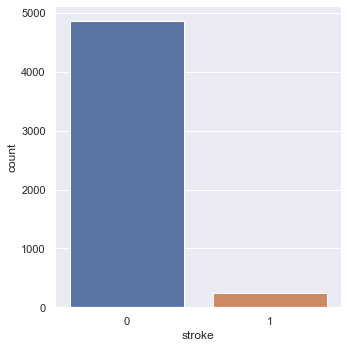

In [6]:
sb.catplot(x='stroke',data=pd.DataFrame(strokedata['stroke']),kind='count')
stroke_value_counts = strokedata.stroke.value_counts().values
printmd('**Distribution:**\nNo Stroke - {} \nHad Stroke - {}\n'.format(stroke_value_counts[0],stroke_value_counts[1]))

---
### What is the problem?

The percentage of positive stroke events is $249/5110 = 4.87\%$. This is quite a small value. <br> So, is having a stroke an anomaly? Can it be predicted using the other variables?

---
## Cleaning and Preparing the Dataset

#### 1) Dropping `id` <a class="anchor" id="droppingid"></a>
The `id` column has values ranging into *tens of thousands* in a dataset of `5110` entries. Therefore, it is not a good index and can simply be dropped. 

In [7]:
strokedata.sample(n=5).id.values

array([21967, 16420, 19209, 59049, 50644])

In [8]:
strokedata.drop('id',axis=1,inplace=True)
strokedata.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


---
#### 2) Cleaning the `gender` column <a class="anchor" id="cleaning_gender"></a>
The `gender` column has 3 unique values - "Male", "Female", "Other" distributed as follows:

In [9]:
strokedata.gender.value_counts()

Female    2994
Male      2115
Other        1
Name: gender, dtype: int64

There is only `1` row with gender marked as "Other". To make exploration and ML analysis easier, we can drop this row. 

In [10]:
strokedata = strokedata[strokedata.gender != "Other"]
print("New Shape -", strokedata.shape)

New Shape - (5109, 11)


---
#### 3) Filling Missing `bmi` Values <a class="anchor" id="filling_bmi"></a>

The `bmi` column has `201` missing values. 

In [11]:
strokedata.isnull().sum(axis = 0)

gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

This represents around $201/5110 = 3.93\%$ of the rows and may be considered a small amount that is safe to drop. However, there are `40` such rows where `strokedata == 1`. This represents a huge loss in the number of positive stroke events ($40/249 = 16.06\%$). Therefore, it will be better to fill the missing `bmi` values instead. 

In [12]:
strokedata[strokedata.bmi.isnull() & strokedata.stroke == 1].reset_index()

,index,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,1,Female,61.00,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
1,8,Female,59.00,0,0,Yes,Private,Rural,76.15,NaN,Unknown,1
2,13,Male,78.00,0,1,Yes,Private,Urban,219.84,NaN,Unknown,1
3,19,Male,57.00,0,1,No,Govt_job,Urban,217.08,NaN,Unknown,1
4,27,Male,58.00,0,0,Yes,Private,Rural,189.84,NaN,Unknown,1
5,29,Male,59.00,0,0,Yes,Private,Rural,211.78,NaN,formerly smoked,1
6,43,Female,63.00,0,0,Yes,Private,Urban,90.90,NaN,formerly smoked,1
7,46,Female,75.00,0,1,No,Self-employed,Urban,109.78,NaN,Unknown,1
8,50,Female,76.00,0,0,No,Private,Urban,89.96,NaN,Unknown,1
9,51,Male,78.00,1,0,Yes,Private,Urban,75.32,NaN,formerly smoked,1


Let's take a look at some basic measures about `bmi` first. 

In [13]:
print("Mean\t", strokedata.bmi.mean())
print("Median\t", strokedata.bmi.median())
print("Mode\t", strokedata.bmi.mode().values[0])

Mean	 28.894559902200502
Median	 28.1
Mode	 28.7


All 3 values are within the range of `28.0` to `29.0`, but a fair estimate of the mean would be one without any **outliers** so they must be dropped.

In [14]:
bmi = pd.DataFrame(strokedata['bmi'])

# Calculating Quartiles and IQR
Q1 = bmi.quantile(0.25).values[0]
Q3 = bmi.quantile(0.75).values[0]
IQR = Q3 - Q1

In [15]:
outliers = []

# Iterate and append outliers to list
for x in range(len(bmi)-1,-1,-1):
    val = bmi.iloc[x].values[0]
    if(val < (Q1 - 1.5 * IQR) or val > (Q3 + 1.5 * IQR)):
        outliers.append(val)
        bmi.drop(bmi.index[x], inplace=True)
        
printmd('**Number of Outliers:** {}'.format(len(outliers)))
printmd('**Range:** {} - {}'.format(min(outliers), max(outliers)))
printmd('**Values:** ' + str(outliers))
printmd('**New Shape:** ' + str(bmi.shape))

&nbsp;**Number of Outliers:** 110

&nbsp;**Range:** 47.6 - 97.6

&nbsp;**Values:** [47.6, 49.5, 56.6, 54.1, 47.6, 47.8, 60.9, 51.7, 48.1, 50.2, 57.2, 48.8, 55.7, 47.6, 57.9, 55.9, 50.8, 92.0, 64.4, 57.2, 50.6, 50.9, 55.0, 47.9, 54.3, 53.8, 49.9, 61.6, 54.7, 52.9, 52.5, 59.7, 50.3, 53.4, 51.9, 49.3, 48.3, 52.7, 50.4, 49.3, 58.1, 48.3, 50.1, 48.0, 61.2, 52.8, 63.3, 51.9, 50.5, 53.5, 55.7, 52.8, 52.7, 48.8, 53.8, 48.9, 48.7, 49.2, 48.5, 49.4, 53.9, 97.6, 56.1, 54.0, 49.8, 49.3, 48.9, 57.7, 51.8, 56.0, 49.8, 57.3, 55.9, 48.5, 55.1, 66.8, 52.8, 50.2, 54.8, 55.0, 49.5, 50.6, 48.4, 55.2, 53.4, 50.2, 78.0, 50.3, 52.3, 54.2, 57.5, 55.7, 55.7, 54.6, 47.8, 50.2, 71.9, 51.5, 51.0, 60.2, 49.8, 54.7, 64.8, 48.2, 54.7, 60.9, 54.6, 50.1, 56.6, 48.9]

&nbsp;**New Shape:** (4999, 1)

There were `110` outliers ranging in values from `47.6` to `97.6`   

These are the new measures of `bmi` after dropping all outliers:

In [16]:
print("Mean\t", bmi.mean().values[0])
print("Median\t", bmi.median().values[0])
print("Mode\t", bmi.mode().values[0][0])

Mean	 28.314818674447704
Median	 27.9
Mode	 28.7


The mean has dropped to `28.3`, which is a more accurate measure and we will be using this number to fill all the missing values  

In [17]:
strokedata.bmi.fillna(28.3,inplace=True)
printmd("**Null List**")
print(strokedata.isnull().sum(axis = 0),'\n')
strokedata.head(10)

&nbsp;**Null List**

gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64 



,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,28.3,never smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
5,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1
6,Male,74.0,1,1,Yes,Private,Rural,70.09,27.4,never smoked,1
7,Female,69.0,0,0,No,Private,Urban,94.39,22.8,never smoked,1
8,Female,59.0,0,0,Yes,Private,Rural,76.15,28.3,Unknown,1
9,Female,78.0,0,0,Yes,Private,Urban,58.57,24.2,Unknown,1


The null values have been successfully filled

---
#### 4) Setting Categorical Columns <a class="anchor" id="setting_categories"></a>

In [18]:
categorical = [ 'gender', 'hypertension', 'heart_disease', 'ever_married', 'work_type', 'Residence_type', 'smoking_status', 'stroke' ]
strokedata[categorical] = strokedata[categorical].astype('category')
strokedata.dtypes

gender               category
age                   float64
hypertension         category
heart_disease        category
ever_married         category
work_type            category
Residence_type       category
avg_glucose_level     float64
bmi                   float64
smoking_status       category
stroke               category
dtype: object


---
## Exploratory Data Analysis

It will be a good idea to see how every variable compares to `stroke` to see whether we can right away identify some variables which have a strong influence on `stroke`. 

Since `stroke` is a naturally dichotomous categorical variable (i.e. it has either happened or not happened, it is not on a scale and we haven't forced it to become dichotomous artificially), when comparing it to continuous variables such as `bmi` and `age`, the point-biserial correlation can be used to give a more accurate measure of the dependency between the two. 

### Numerical Variables
<a class="anchor" id="age"></a>
#### 1) age 

In [19]:
age = pd.DataFrame(strokedata.age)
age.describe()

,age
count,5109.000000
mean,43.229986
std,22.613575
min,0.080000
25%,25.000000
50%,45.000000
75%,61.000000
max,82.000000


The patient ages are distributed from `0.08` to `82.0` years of age. `0.08` years is roughly equal to `29 days`, so patients as young as 1-month old infants are also included in this study.

&nbsp;**Boxplot**

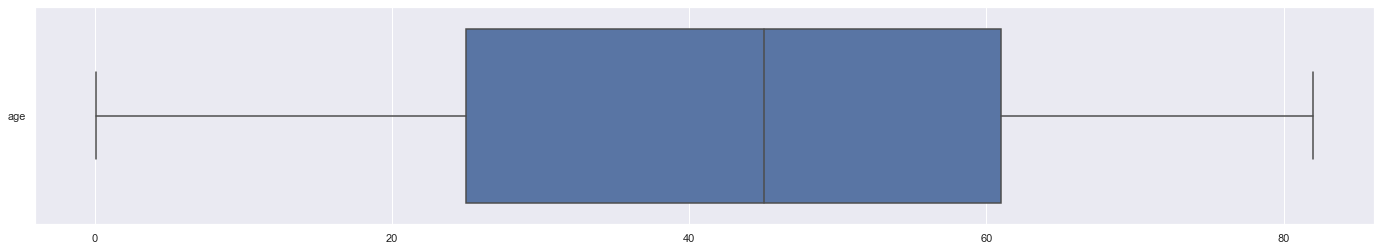

In [20]:
printmd("**Boxplot**")
f = plt.figure(figsize=(24, 4))
sb.boxplot(data = age, orient = "h");

There are no outliers within `age` 

&nbsp;**Histplot with KDE**

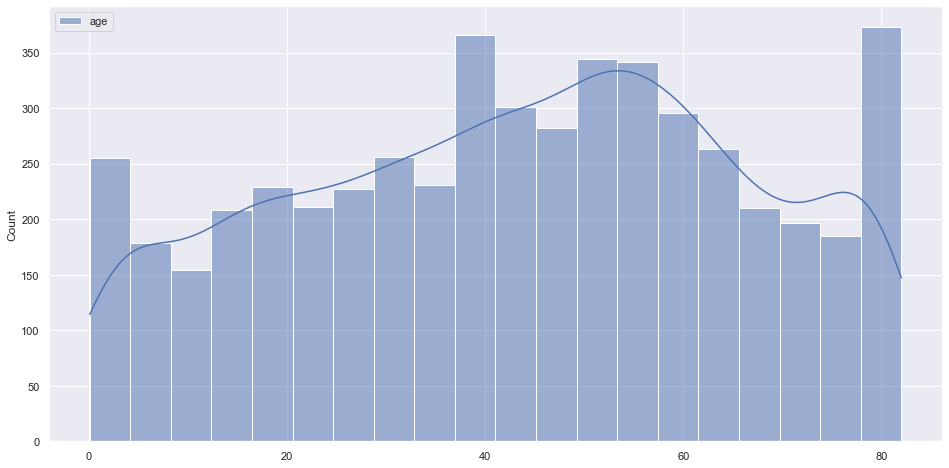

In [21]:
printmd("**Histplot with KDE**")
f = plt.figure(figsize=(16, 8))
sb.histplot(data = age, kde = True);

The data is distributed fairly equally between all age groups though there are less patients in the `0-20` years age group. 

&nbsp;**`age` vs `stroke` Boxplot and Swarmplot (Stripped)**

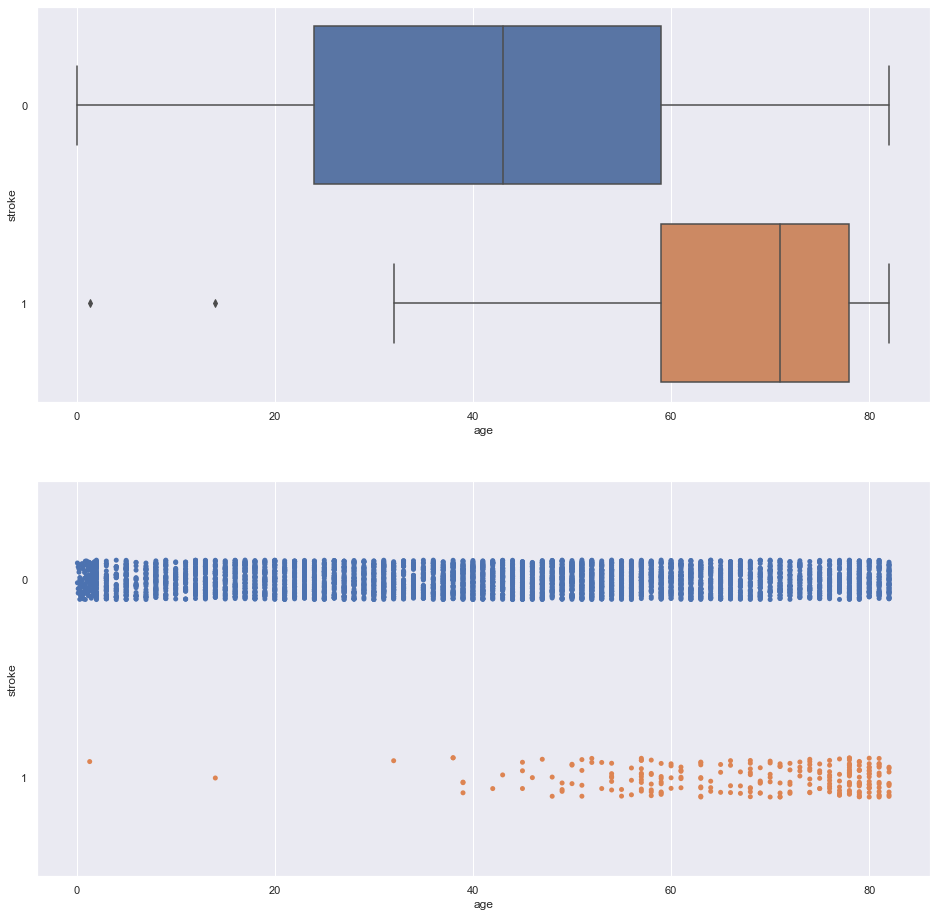

In [22]:
printmd("**`age` vs `stroke` Boxplot and Swarmplot (Stripped)**")
fig, (boxplot, swarmplot) = plt.subplots(2,1,figsize=(16,16))
sb.boxplot(x = 'age', y = 'stroke', data = strokedata, orient="h", ax = boxplot)
sb.stripplot(x = 'age', y = 'stroke', data = strokedata, orient="h", ax = swarmplot);

When comparing `age` to `stroke` there is a significant difference between the medians and spread of `no stroke` and `positive stroke` events. Positive stroke events generally occur in older age groups with 50% of them lying between the `60-80` age group. 

There are also 2 patients (roughly aged `1` and `17`) who had a stroke and they are considered to be outliers. 

Point-biserial correlation can be used to give a more accurate measure of dependency. Since it is based on Pearson's correlation coefficient, it will be heavily affected by outliers. So, we will remove the 2 outliers when calculating the coefficient. 

In [23]:
# Make copy with just age and stroke
age_stroke = strokedata[['age', 'stroke']].copy()

# Filter outliers
age_stroke.drop(age_stroke[(age_stroke.stroke == 1) & (age_stroke.age < 20)].index, inplace=True)

print('New Shape -', age_stroke.shape)

New Shape - (5107, 2)


In [24]:
stats.pointbiserialr(age_stroke.age, age_stroke.stroke)

PointbiserialrResult(correlation=0.24903811899662243, pvalue=4.7261223214151606e-73)

From the box plot comparison, it seemed that there would be a strong relation between `age` and `stroke`, especially because of the older age groups. However, point-biserial only gave a low correlation of `0.25` and that may have to do with the difference in sizes between no stroke and positive stroke events. 

In [25]:
print('Total Stroke -', len(strokedata[strokedata.stroke == 1]))

printmd('**Age Group 60-80**')
print('Total - ', len(strokedata[(strokedata.age >= 60) & (strokedata.age <= 80)]))
print('No Stroke -', len(strokedata[(strokedata.stroke == 0) & (strokedata.age >= 60) & (strokedata.age <= 80)]))
print('Had Stroke -', len(strokedata[(strokedata.stroke == 1) & (strokedata.age >= 60) & (strokedata.age <= 80)]))

Total Stroke - 249


&nbsp;**Age Group 60-80**

Total -  1260
No Stroke - 1102
Had Stroke - 158


We can see that even though a huge chunk ($158/249 = 63.45\%$) of positive stroke events belong to the `60-80` age group. There are still many in this age group who never had a stroke and these positive stroke events only represent a small fraction of this age group. $(128/1260 = 10.16\%)$, which further substantiates the low correlation.

---
<a class="anchor" id="avg_glucose_level"></a>
#### 2) avg_glucose_level

In [26]:
glucose = pd.DataFrame(strokedata.avg_glucose_level)
glucose.describe()

,avg_glucose_level
count,5109.000000
mean,106.140399
std,45.285004
min,55.120000
25%,77.240000
50%,91.880000
75%,114.090000
max,271.740000


`avg_glucose_level` has values ranging from `55.12` to `271.74`. Glucose level is measured in mg/dL where `140mg/dL` is considered normal, `70-90mg/dL` is acceptable and happens oftentimes during fasting, glucose beyond `180mg/dL` is considered to be risky and could be an indicator of diabetes. 

&nbsp;**Boxplot**

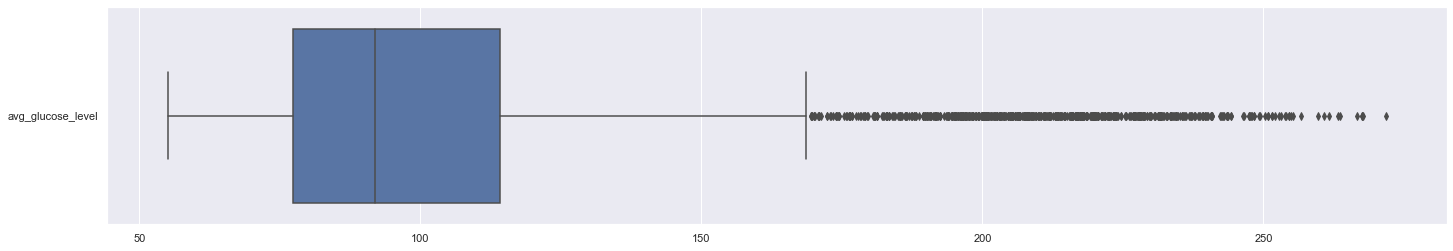

In [27]:
printmd("**Boxplot**")
f = plt.figure(figsize=(24, 4))
sb.boxplot(data = glucose, orient = "h");

There are many outliers within `avg_glucose_level` with all of them lying at more than approximately `170mg/dL`, which means people with diabetes or at risk of diabetes are considered outliers. 

&nbsp;**Histplot with KDE**

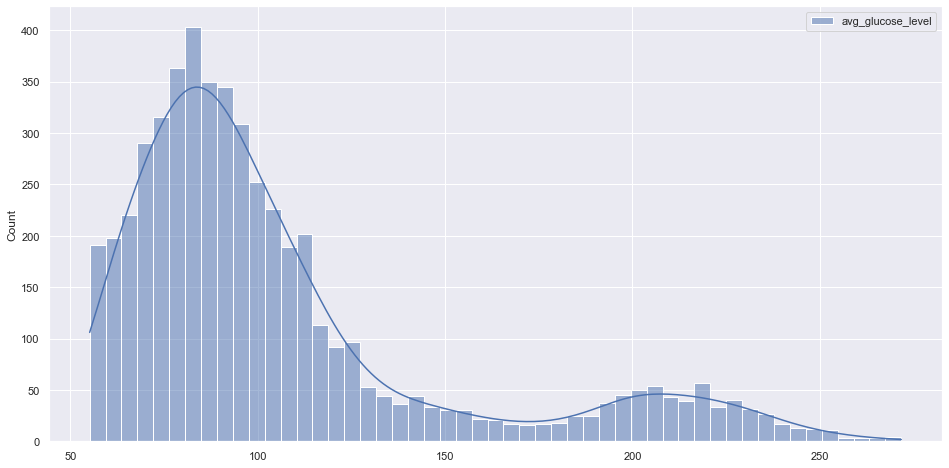

In [28]:
printmd("**Histplot with KDE**")
f = plt.figure(figsize=(16, 8))
sb.histplot(data = glucose, kde = True);

The histplot with kde explains why this is the case. There is a very nice, normal-looking distribution at the start which slowly becomes highly positively skewed and as the density starts to pick up again around the `170` mark, everything beyond `170` is considered an outlier. 

In [29]:
# Calculating Quartiles and IQR
Q1 = glucose.quantile(0.25).values[0]
Q3 = glucose.quantile(0.75).values[0]
IQR = Q3 - Q1

In [30]:
outliers = []

# Iterate and append outliers to list
for x in range(len(bmi)-1,-1,-1):
    val = glucose.iloc[x].values[0]
    if(val < (Q1 - 1.5 * IQR) or val > (Q3 + 1.5 * IQR)):
        outliers.append(val)
        
printmd("There are `" + str(len(outliers)) + "` outliers")
printmd("Minimum value is `" + str(min(outliers)) + "`")

&nbsp;There are `614` outliers

&nbsp;Minimum value is `169.43`

Which represents $614/5109 = 12.02\%$ of the dataset

&nbsp;**`avg_glucose_level` vs `stroke` Boxplot and Swarmplot (Stripped)**

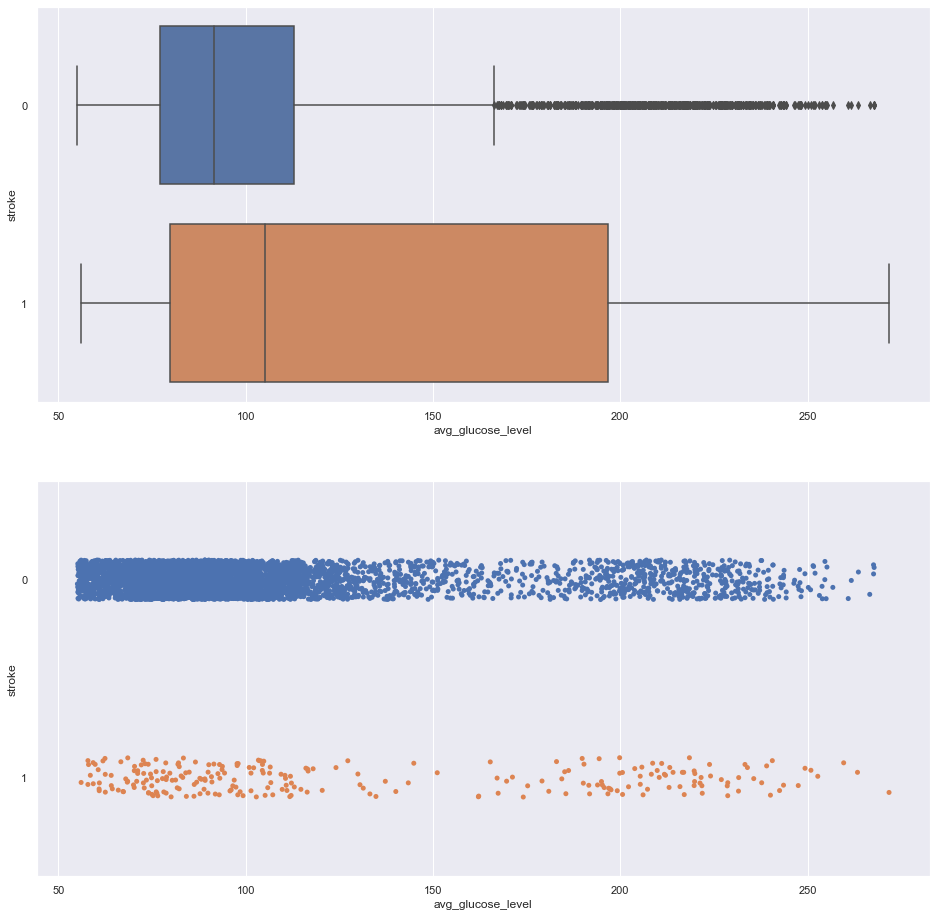

In [31]:
printmd("**`avg_glucose_level` vs `stroke` Boxplot and Swarmplot (Stripped)**")
fig, (boxplot, swarmplot) = plt.subplots(2,1,figsize=(16,16))
sb.boxplot(x = 'avg_glucose_level', y = 'stroke', data = strokedata, orient="h", ax = boxplot)
sb.stripplot(x = 'avg_glucose_level', y = 'stroke', data = strokedata, orient="h", ax = swarmplot);

When comparing `avg_glucose_level` to `stroke`, it can be seen that no stroke has all the outliers. Both swarm plots are covering about the same range (when including outliers) and the box plots have very close medians. It is unlikely that this variable has much of a correlation with `stroke`. We can still compute the point-biserial correlation to confirm. 

In [32]:
# Make copy with only avg_glucose_level and stroke
glucose_stroke = strokedata[['avg_glucose_level', 'stroke']].copy()

printmd("**With Outliers**")
print(stats.pointbiserialr(glucose_stroke.avg_glucose_level, glucose_stroke.stroke))
print()

# Filter outliers
glucose_stroke.drop(glucose_stroke[(glucose_stroke.stroke == 0) & (glucose_stroke.avg_glucose_level >= 169.43)].index, inplace=True)

printmd("**Without Outliers** (New Shape: " + str(glucose_stroke.shape) + ")")
stats.pointbiserialr(glucose_stroke.avg_glucose_level, glucose_stroke.stroke)

&nbsp;**With Outliers**

PointbiserialrResult(correlation=0.13199119156645792, pvalue=2.705302697195377e-21)



&nbsp;**Without Outliers** (New Shape: (4566, 2))

PointbiserialrResult(correlation=0.3352194587799321, pvalue=2.5656520736276234e-120)

With outliers, `avg_glucose_level` has an even lower correlation with `stroke` than `age` (`0.13` vs `0.25`). That changes when outliers are removed (`0.34` vs `0.25`). However, the more than 10% outliers forgone to achieve a still low correlation of `0.34` indicates that this variable may also not be good at predicting `stroke`. 

---
<a class="anchor" id="bmi"></a>
#### 3) bmi

In [33]:
bmi = pd.DataFrame(strokedata.bmi)
bmi.describe()

,bmi
count,5109.000000
mean,28.871169
std,7.699103
min,10.300000
25%,23.800000
50%,28.300000
75%,32.800000
max,97.600000


`bmi` has values ranging from `10.3` to `97.6`. BMI less than `18` is considered underweight, more than `30` is considered to be obese whereas more than `40` is considered to be extreme obesity. 

&nbsp;**Boxplot**

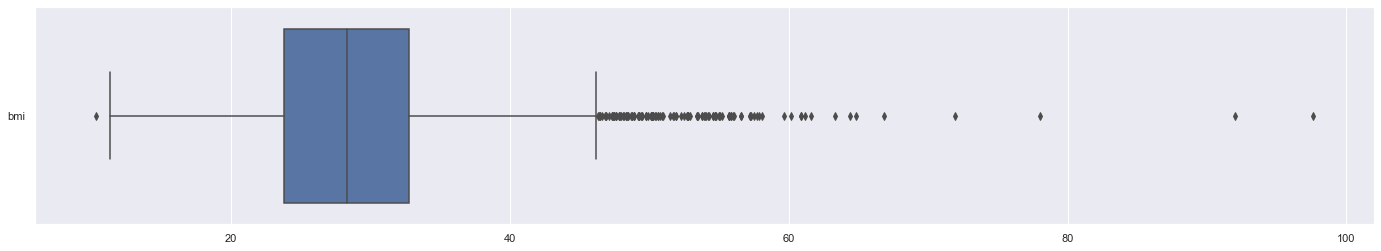

In [34]:
printmd("**Boxplot**")
f = plt.figure(figsize=(24, 4))
sb.boxplot(data = bmi, orient = "h");

`bmi` has many outliers with most of them lying at more than `45` approximately. There is one outlier on the other end, which is the minimum `bmi` value of the entire dataset (`10.3`)

&nbsp;**Histplot with KDE**

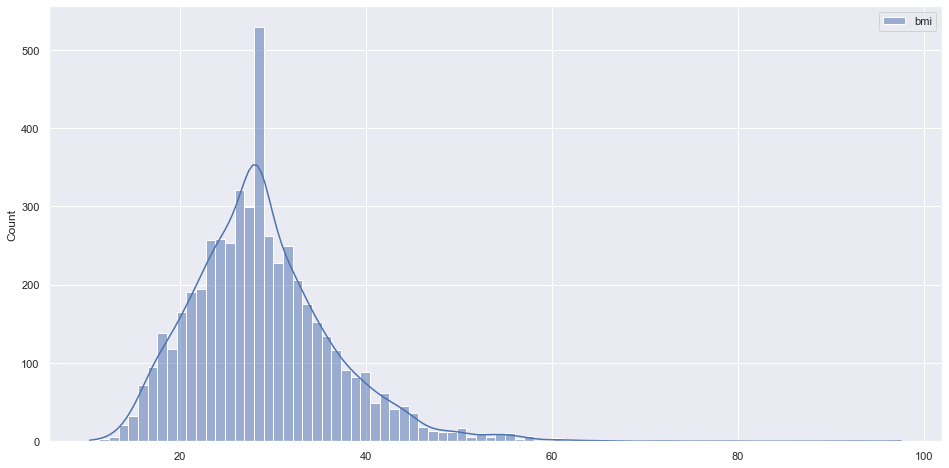

In [35]:
printmd("**Histplot with KDE**")
f = plt.figure(figsize=(16, 8))
sb.histplot(data = bmi, kde = True);

The histplot with kde shows a very normal-looking distribution for `bmi` up until around a `bmi` of `45` or so, after which the remaining values are considered to be outliers. There is also a huge bar at around `28` and this is because the mode previously laid at around `28`, and `201` missing `bmi` values were then filled with the value of `28.3` on top of that. 

In [36]:
# Calculating Quartiles and IQR
Q1 = bmi.quantile(0.25).values[0]
Q3 = bmi.quantile(0.75).values[0]
IQR = Q3 - Q1

In [37]:
outliers = []

# Iterate and append outliers to list
for x in range(len(bmi)-1,-1,-1):
    val = bmi.iloc[x].values[0]
    if(val < (Q1 - 1.5 * IQR) or val > (Q3 + 1.5 * IQR)):
        outliers.append(val)
        
printmd("There are `" + str(len(outliers)) + "` outliers")
printmd("First 2 values are `" + str(min(outliers)) + "` and `" + str(sorted(outliers)[1]) + "`")

&nbsp;There are `126` outliers

&nbsp;First 2 values are `10.3` and `46.3`

Which represents $126/5109 = 2.47\%$ of the dataset

&nbsp;**`bmi` vs `stroke` Boxplot and Swarmplot (Stripped)**

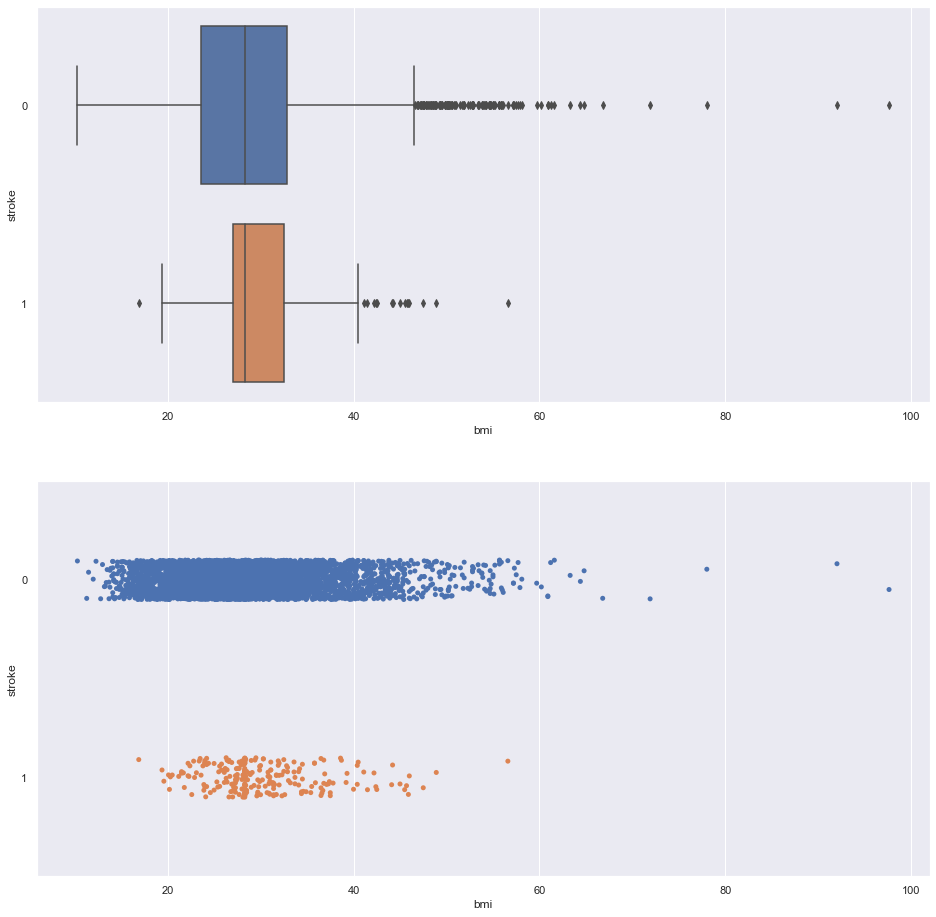

In [38]:
printmd("**`bmi` vs `stroke` Boxplot and Swarmplot (Stripped)**")
fig, (boxplot, swarmplot) = plt.subplots(2,1,figsize=(16,16))
sb.boxplot(x = 'bmi', y = 'stroke', data = strokedata, orient="h", ax = boxplot)
sb.stripplot(x = 'bmi', y = 'stroke', data = strokedata, orient="h", ax = swarmplot);

When comparing `bmi` to `stroke`, we can see it has similar problems as `avg_glucose_level` with the medians of both categories being somewhat equal and a spread in `no stroke` which encompasses the entire range of `bmi` values (which means that the range of `bmi` values for positive `stroke` events is a subset of `no stroke` and there isn't much of a difference between the two). This time, both categories also have outliers. These are some indications of a low correlation, but we can still calculate the point-biserial correlation coefficient. 

In [39]:
# Make copy with only bmi and stroke
bmi_stroke = strokedata[['bmi', 'stroke']].copy()

printmd("**With Outliers**")
print(stats.pointbiserialr(bmi_stroke.bmi, bmi_stroke.stroke))
print()

# Filter outliers
bmi_stroke.drop(bmi_stroke[(bmi_stroke.bmi <= 10.3) | (bmi_stroke.bmi >= 46.3)].index, inplace=True)

printmd("**Without Outliers** (New Shape: " + str(bmi_stroke.shape) + ")")
stats.pointbiserialr(bmi_stroke.bmi, bmi_stroke.stroke)

&nbsp;**With Outliers**

PointbiserialrResult(correlation=0.03679194945167234, pvalue=0.008537608278507454)



&nbsp;**Without Outliers** (New Shape: (4983, 2))

PointbiserialrResult(correlation=0.055216995695364, pvalue=9.627799937088777e-05)

`bmi` has the lowest correlation of any continuous numerical variable so far. It is only `0.04` with outliers and `0.06` without. We can try to see if filling the null values had any effect by doing the same but with the old bmi dataset. 

**Testing Correlation without filled values**

In [40]:
# Read old data (before filling) from file again
old_strokedata = pd.read_csv('healthcare-dataset-stroke-data.csv')

# Make copy with only bmi and stroke again and drop null values this time
bmi_stroke = old_strokedata[['bmi', 'stroke']].copy()
bmi_stroke.dropna(axis=0, inplace=True)

printmd("**With Outliers**")
print(stats.pointbiserialr(bmi_stroke.bmi, bmi_stroke.stroke))
print()

&nbsp;**With Outliers**

PointbiserialrResult(correlation=0.04237366114922739, pvalue=0.0029832690997661)



In [41]:
# Load bmi again to filter outliers
bmi = pd.DataFrame(bmi_stroke.bmi)
Q1 = bmi.quantile(0.25).values[0]
Q3 = bmi.quantile(0.75).values[0]
IQR = Q3 - Q1

In [42]:
# Iterate and delete outliers
for x in range(len(bmi)-1,-1,-1):
    val = bmi.iloc[x].values[0]
    if(val < (Q1 - 1.5 * IQR) or val > (Q3 + 1.5 * IQR)):
        bmi_stroke.drop(bmi.index[x], inplace=True)

In [43]:
printmd("**Without Outliers** (New Shape: " + str(bmi_stroke.shape) + ")")
stats.pointbiserialr(bmi_stroke.bmi, bmi_stroke.stroke)

&nbsp;**Without Outliers** (New Shape: (4799, 2))

PointbiserialrResult(correlation=0.060289877002425225, pvalue=2.924283662558097e-05)

Filling the missing data has not really affected the relation between `bmi` and `stroke`. When using the old data will null values dropped, the correlation only increased by a very small value of `0.005` in both cases (with and without outliers). 

---

### Dichotomous Categorical Variables

The remaining variables are all categorical, with most being dichotomous just like `bmi`. For such variables, we can use the `phi coefficient` to get a statistical measure of the correlation between `bmi` and another dichtomous binary variable. phi coefficient is available as Matthews correlation coefficient (`MCC`) in sklearn. 

In [44]:
from sklearn.metrics import matthews_corrcoef

In [45]:
def bin_cat_eda(name):
    # Create and show contingency table
    printmd("**Contingency Table**")
    table = pd.crosstab(index = strokedata['stroke'], columns = strokedata[name])
    display(table)
    
    print()
    printmd("**Countplot and Positive Stroke Percentage Barplot**")
    fig, (countplot, barplot) = plt.subplots(2,1,figsize=(5,10))

    # Show bivariate countplot
    sb.countplot(x = name, hue = "stroke", data = strokedata, ax=countplot)

    # Calculate 'Positive Stroke Event Percentage' and store as new DataFrame
    cats = list(strokedata[name].cat.categories)
    percent_dict = { cats[0] : (table.values[1][0] / (table.values[1][0] + table.values[0][0])) * 100, cats[1] : (table.values[1][1] / (table.values[1][1] + table.values[0][1])) * 100 }
    df = pd.DataFrame(percent_dict.items(), columns = [ name, 'positive stroke percent' ])

    # Show barplot
    sb.barplot(x=name, y='positive stroke percent', data = df, ax=barplot)
    barplot.set(ylim=(0, 100))
    barplot.set(ylabel="positive stroke events (%)")

    # Add percentage on top of bar
    x = 0
    for index, row in df.iterrows():
        barplot.text(x,row.values[1] + 1, str(round(row.values[1],2)) + "%", color='black', ha="center")
        x += 1

    plt.show()

    # Calculate and Print MCC
    stroke_copy = strokedata[[name, 'stroke']].copy()
    stroke_copy[name] = stroke_copy[name].cat.rename_categories({ cats[0] : 0, cats[1] : 1 })
    print()
    printmd("**MCC**: " + str(matthews_corrcoef(stroke_copy['stroke'], stroke_copy[name])))

The helper function above will calculate and display everything needed for the EDA of dichotomous categorical variables vs `stroke` since the process is about the same for all such variables. 

---
<a class="anchor" id="gender"></a>
#### 4) gender

&nbsp;**Contingency Table**

gender,Female,Male
stroke,,
0,2853,2007
1,141,108


&nbsp;**Countplot and Positive Stroke Percentage Barplot**

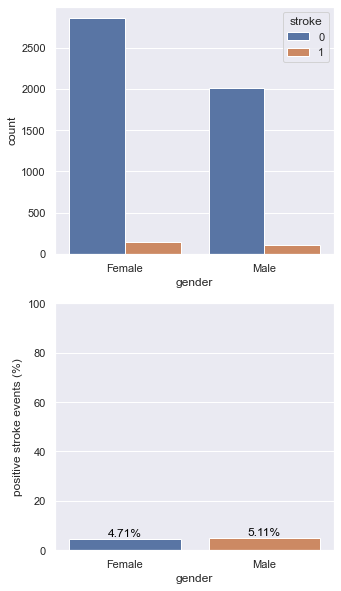

&nbsp;**MCC**: 0.009080600160079338

In [46]:
bin_cat_eda('gender')

Both genders have about the same percentage of positive stroke events, and their correlation is only `0.01`. This indicates that `gender` has nothing to do with the likelihood of a person have a `stroke`. If we go by just `gender`, then everyone is at an equal risk of having a stroke.  

---
<a class="anchor" id="hypertension"></a>
#### 5) hypertension

&nbsp;**Contingency Table**

hypertension,0,1
stroke,,
0,4428,432
1,183,66


&nbsp;**Countplot and Positive Stroke Percentage Barplot**

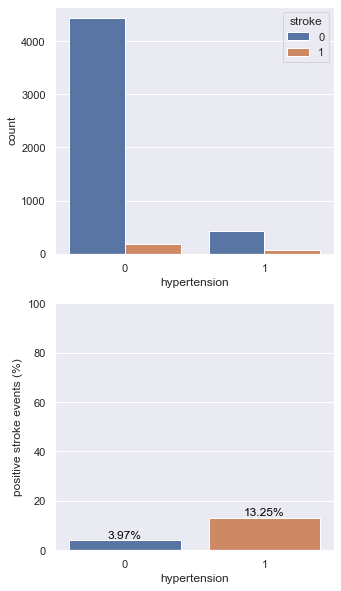

&nbsp;**MCC**: 0.12789125912919305

In [47]:
bin_cat_eda('hypertension')

People with `hypertension` have significantly more risk of having a stroke than those who don't (Positive stroke percentages of `3.97%` vs `13.25%`). However, the correlation between `hypertension` and `stroke` is still low due to only a handful of people having a `stroke` in either category. 

---
<a class="anchor" id="heart_disease"></a>
#### 6) heart_disease

&nbsp;**Contingency Table**

heart_disease,0,1
stroke,,
0,4631,229
1,202,47


&nbsp;**Countplot and Positive Stroke Percentage Barplot**

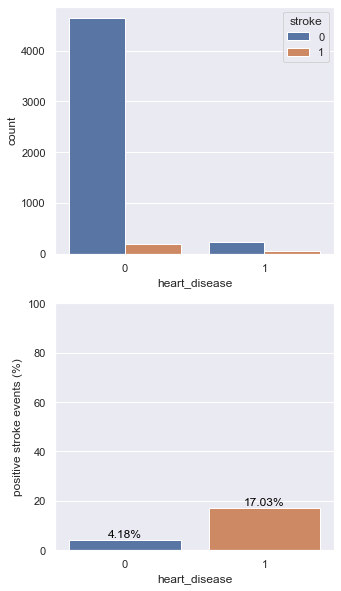

&nbsp;**MCC**: 0.1349048418004286

In [48]:
bin_cat_eda('heart_disease')

`heart_disease` is similar to `hypertension` with people who had `heart_disease` having a higher percentage of positive `stroke` events, but still a low correlation due to only a minority having a `stroke`.

[Jump to a comparison of heart_disease and hypertension vs stroke](#11\)-hypertension-and-heart_disease-vs-stroke)

---
<a class="anchor" id="ever_married"></a>
#### 7) ever_married

&nbsp;**Contingency Table**

ever_married,No,Yes
stroke,,
0,1727,3133
1,29,220


&nbsp;**Countplot and Positive Stroke Percentage Barplot**

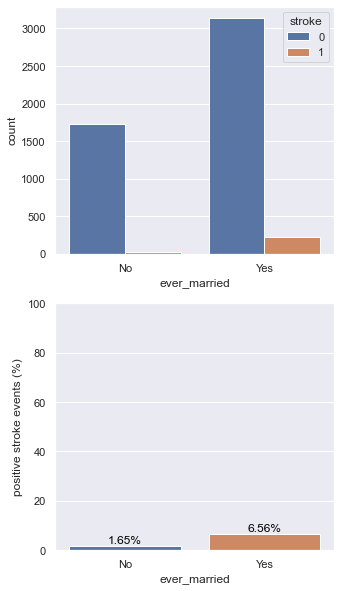

&nbsp;**MCC**: 0.10829931566075396

In [49]:
bin_cat_eda('ever_married')

People who have not been married are most likely to be children and young adults. As we previously saw when exploring `age`, they are very less likely to have a stroke, which explains the `1.65%` of positive stroke events. The older people who have had a stroke are likely to be married, which is why the percentage of positive `stroke` events is relatively higher for the `Yes` category in `ever_married`. Yet again, the correlation is still low due to only a minority of people actually having a `stroke`. 

---
<a class="anchor" id="Residence_type"></a>
#### 8) Residence_type

&nbsp;**Contingency Table**

Residence_type,Rural,Urban
stroke,,
0,2399,2461
1,114,135


&nbsp;**Countplot and Positive Stroke Percentage Barplot**

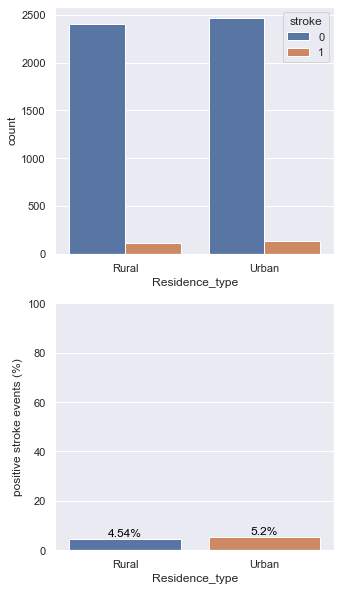

&nbsp;**MCC**: 0.01541458421031582

In [50]:
bin_cat_eda('Residence_type')

`Residence_type` has a similar story to `gender` where both categories have about the same percentage of positive `stroke` events and there is not much difference between the two which is why the correlation is only `0.02`. So it seems that it doesn't matter whether a person is living in a `Rural` area or an `Urban` one, both are equally at risk of having a `stroke`.  

---
### Polychotomous Categorical Variables

Unlike other categorical variables in this dataset, the remaining variables (`work_type` and `smoking_status`) are not dichotomous and consist of more than 2 different categories. We can use a similar approach for EDA, however, `MCC` cannot be used as a statistical tool to measure the correlation anymore since it only works for 2 dichotomous variables. Instead, we can use `Cramer's V` along with `Chi-Square Contingency` to calculate the correlation between 2 polychotomous categorical variables. The code below has been adapted from https://stackoverflow.com/questions/20892799/using-pandas-calculate-cram%C3%A9rs-coefficient-matrix and then slightly modified. It follows the explanations mentioned in https://en.wikipedia.org/wiki/Cram%C3%A9r%27s_V. It consists of some bias corrections for contingency tables larger than `2x2` to make the test more accurate.

In [51]:
def cramers_corrected_stat(confusion_matrix):
    """ calculate Cramers V statistic for categorial-categorial association.
        uses correction from Bergsma and Wicher, 
        Journal of the Korean Statistical Society 42 (2013): 323-328
    """    
    chi2 = stats.chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    
    phi2 = chi2/n
    r,k = confusion_matrix.shape
    
    # bias correction
    phi2corr = max(0, phi2 - ((k-1)*(r-1))/(n-1))    
    rcorr = r - ((r-1)**2)/(n-1)
    kcorr = k - ((k-1)**2)/(n-1)
    return np.sqrt(phi2corr / min( (kcorr-1), (rcorr-1)))

To evaluate how well this correlation function works, we can test it on previous categorical variables for which we have the `MCC` value.  

In [52]:
residence_table = pd.crosstab(index = strokedata['stroke'], columns = strokedata['Residence_type'])
ever_married_table = pd.crosstab(index = strokedata['stroke'], columns = strokedata['ever_married'])

printmd("**Cramer's V (With Bias Correction)**")
print("Residence_type:\t", cramers_corrected_stat(residence_table))
print("ever_married:\t", cramers_corrected_stat(ever_married_table))

def cramers_stat(confusion_matrix):
    chi2 = stats.chi2_contingency(confusion_matrix,correction=False)[0]
    n = confusion_matrix.sum().sum()
    
    phi2 = chi2/n
    r,k = confusion_matrix.shape
    
    return np.sqrt(phi2/min(k-1,r-1))

printmd("**Cramer's V (No Correction)**")
print("Residence_type:\t", cramers_stat(residence_table))
print("ever_married:\t", cramers_stat(ever_married_table))

&nbsp;**Cramer's V (With Bias Correction)**

Residence_type:	 0.0038260825246609897
ever_married:	 0.10643693254276906


&nbsp;**Cramer's V (No Correction)**

Residence_type:	 0.015414584210315819
ever_married:	 0.10829931566075394


The value returned for `ever_married` is very similar to `MCC`. (`0.106` vs `0.108`). It is quite small for `Residence_type` (`0.004` vs `0.015`) and that is due to the bias correction. `Cramer's V` without bias correction returns exactly the same values as `MCC` for `2x2` contingency tables. However, for tables larger than `2x2`, the correction bias proposed by Bergsma and Wicher (https://doi.org/10.1016%2Fj.jkss.2012.10.002) makes it more reliable and therefore, we can justifiably use `Cramer's V` as a statistic tool to measure the correlation between polychotmous categorical variables. 

Now, we can slightly adjust the `bin_cat_eda` function to make it work for multi-category variables.

In [53]:
def multi_cat_eda(name):
    # Create and show contingency table
    printmd("**Contingency Table**")
    table = pd.crosstab(index = strokedata['stroke'], columns = strokedata[name])
    display(table)
    
    print()
    printmd("**Countplot and Positive Stroke Percentage Barplot**")
    fig, (countplot, barplot) = plt.subplots(2,1,figsize=(8,10))

    # Show bivariate countplot
    sb.countplot(x = name, hue = "stroke", data = strokedata, ax=countplot)

    percent_dict = {}

    # Compute and add percentages to dict
    catlist = list(strokedata[name].cat.categories)
    for x in range(0,len(catlist)):
        percent_dict[catlist[x]] = (table.values[1][x] / (table.values[1][x] + table.values[0][x])) * 100
    
    df = pd.DataFrame(percent_dict.items(), columns = [ name, 'positive stroke percent' ])

    # Show barplot
    sb.barplot(x=name, y='positive stroke percent', data = df, ax=barplot)
    barplot.set(ylim=(0, 100))
    barplot.set(ylabel="positive stroke events (%)")

    # Add percentage on top of bar
    x = 0
    for index, row in df.iterrows():
        barplot.text(x,row.values[1] + 1, str(round(row.values[1],2)) + "%", color='black', ha="center")
        x += 1

    plt.show()
    print()
    
    # Calculate and Print Cramer's V
    printmd("**Cramer's V**: " + str(cramers_corrected_stat(table)))

---
<a class="anchor" id="work_type"></a>
#### 9) work_type

&nbsp;**Contingency Table**

work_type,Govt_job,Never_worked,Private,Self-employed,children
stroke,,,,,
0,624,22,2775,754,685
1,33,0,149,65,2


&nbsp;**Countplot and Positive Stroke Percentage Barplot**

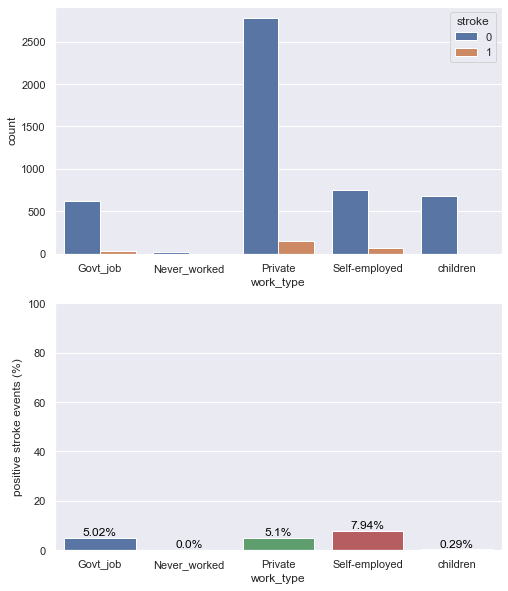

&nbsp;**Cramer's V**: 0.09402507124986106

In [54]:
multi_cat_eda('work_type')

The percentage of positive `stroke` events is almost equal for `Govt_job` and `Private`. `Self-employed` is just slightly higher, but this doesn't mean much.`children` only has a positive `stroke` percentage of `0.29%` and this is because only `2` `children` had `stroke`. As we saw previously in `age`, those `2` `children` are outliers. Interestingly, `Never_worked` has no positive `stroke` cases, but that is because of how small the sample size is. There are only `22` individiuals in the `Never_worked` category. This does not mean that if one does not work then they will not have a stroke. 

`Cramer's V` has given a weak correlation of `0.09` which makes sense. If we were to drop the `Never_worked` and `children` categories, then this correlation would go even lower. 

In [55]:
work_stroke = strokedata[['work_type', 'stroke']].copy()
work_stroke.drop(work_stroke[(work_stroke.work_type == 'children') | (work_stroke.work_type == 'Never_worked')].index, inplace=True)
printmd("New Shape: " + str(work_stroke.shape))
printmd("**Cramer's V**: " + str(cramers_corrected_stat(pd.crosstab(index = work_stroke['stroke'], columns = work_stroke['work_type']))))

&nbsp;New Shape: (4400, 2)

&nbsp;**Cramer's V**: 0.04331326403166337

Indeed, the correlation has fallen down by more than `50%` to `0.04`

---
<a class="anchor" id="smoking_status"></a>
#### 10) smoking_status

&nbsp;**Contingency Table**

smoking_status,Unknown,formerly smoked,never smoked,smokes
stroke,,,,
0,1497,814,1802,747
1,47,70,90,42


&nbsp;**Countplot and Positive Stroke Percentage Barplot**

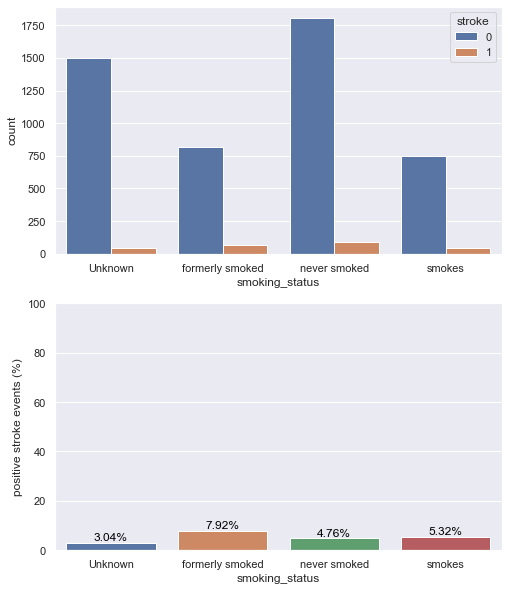

&nbsp;**Cramer's V**: 0.07165285008520017

In [56]:
multi_cat_eda("smoking_status")

There is very little difference between the positive `stroke` percentages of `never_smoked` and `smokes`. Interestingly, those who `formerly smoked` (`4.76%` vs `5.32%`) have a much higher percentage (`7.92%`). The correlation given by `Cramer's V` is very low (`0.07`). However, the `Unknown` category occupies a big chunk of the data, and we cannot say for sure to which actual categories do the patients in the `Unknown` category belong. As such, we should look at the correlation without this category.

In [57]:
smoking_stroke = strokedata[['smoking_status', 'stroke']].copy()
smoking_stroke.drop(smoking_stroke[(smoking_stroke.smoking_status == 'Unknown')].index, inplace=True)
printmd("New Shape: " + str(smoking_stroke.shape))
printmd("**Cramer's V**: " + str(cramers_corrected_stat(pd.crosstab(index = smoking_stroke['stroke'], columns = smoking_stroke['smoking_status']))))

&nbsp;New Shape: (3565, 2)

&nbsp;**Cramer's V**: 0.05160187418382937

The correlation has fallen to an even lower score of `0.05`, indicating that `smoking_status` may not be a good predictor for `stroke`. 

---
<a class="anchor" id="hyperheart"></a>
#### 11) hypertension and heart_disease vs stroke
Let's start by first creating a new column which merges `hypertension`and `heart_disease`

In [58]:
hyper_heart_list = []

# Fill list
for x in range(0,len(strokedata)):
    hypertension = strokedata.hypertension.iloc[x]
    heart_disease = strokedata.heart_disease.iloc[x]
    
    # value is determined by the combination of hypertension and heart_disease
    if hypertension and heart_disease:
        hyper_heart_list.append('both')
    elif hypertension:
        hyper_heart_list.append('hypertension')
    elif heart_disease:
        hyper_heart_list.append('heart_disease')
    else:
        hyper_heart_list.append('neither')

strokedata['hyper_heart'] = hyper_heart_list
strokedata['hyper_heart'] = strokedata['hyper_heart'].astype('category')
strokedata['hyper_heart']

0       heart_disease
1             neither
2       heart_disease
3             neither
4        hypertension
            ...      
5105     hypertension
5106          neither
5107          neither
5108          neither
5109          neither
Name: hyper_heart, Length: 5109, dtype: category
Categories (4, object): ['both', 'heart_disease', 'hypertension', 'neither']

***EDA***

&nbsp;**Contingency Table**

hyper_heart,both,heart_disease,hypertension,neither
stroke,,,,
0,51,178,381,4250
1,13,34,53,149


&nbsp;**Countplot and Positive Stroke Percentage Barplot**

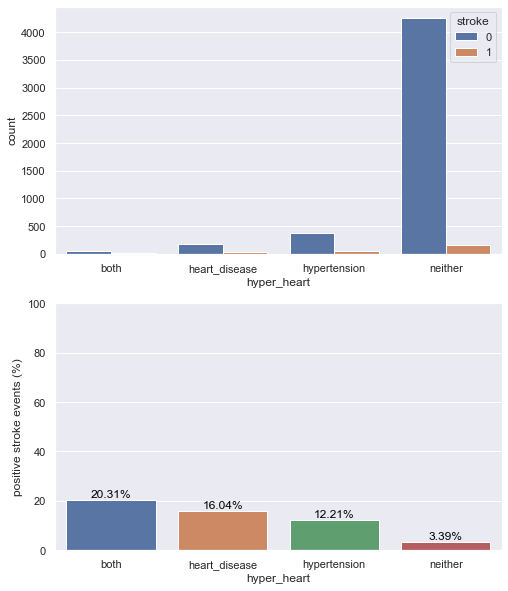

&nbsp;**Cramer's V**: 0.17602643249899386

In [59]:
multi_cat_eda("hyper_heart")
strokedata.drop('hyper_heart', axis=1, inplace=True)

Combining `heart_disease` and `hypertension` has given us the best categorical variable in terms of correlation (`0.17`) and distinction between categories so far. `20.0%` of all patients with both `hypertension` and `heart disease` had a `stroke`, compared to just `3.39%` of those who had `neither`. It may not signify a strong relationship between the new variable and `stroke`, but it helps identify the groups that can be considered "at risk". 

---
## Preparing Dataset for ML Analysis

In [60]:
#Making a copy of strokedata
mldata = strokedata.copy()

---
<a class="anchor" id="drop_nv"></a>
#### 1) Dropping 'Never_worked' from work_type

As we found out in the EDA, the `Never_worked` category of `work_type` only consists of `22` entries (representing only `0.43%` of the dataset) with none of them having a `stroke`. This category is separate from `children`, so it only consists of adults who have never worked before. We can drop this category to make ML Analysis easier by reducing a column when one-hot encoding the categorical variables later. 

In [61]:
oldlen = len(mldata)
mldata = mldata[mldata.work_type != 'Never_worked']
mldata.reset_index(drop=True)
mldata.work_type = mldata.work_type.cat.remove_unused_categories()

print('Category List -', list(mldata.work_type.cat.categories))
print('New Shape -',mldata.shape)
print("Removed {} values".format(oldlen - len(mldata)))

Category List - ['Govt_job', 'Private', 'Self-employed', 'children']
New Shape - (5087, 11)
Removed 22 values


---
<a class="anchor" id="drop_ss"></a>
#### 2) Dropping smoking_status

There are a total of $(1497 + 47 = 1544)$ `Unknown` or missing values in the `smoking_status` column. This accounts for $(1544/5109 = 30.22\%)$ of the entire dataset. We have decided to drop the `smoking_status` column entirely for the following reasons (going from most important to least):

1. We cannot drop the missing rows. Removing 30% of the rows would be losing almost 1/3rd of the entire dataset. It would also lead to a drop of $(47/249 = 18.88\%)$ of positive stroke values - our main area of concern. 
2. Filling the missing values is avoidable. First of all, `smoking_status` is categorical, which means we would have to go with a simple metric like `mode` or try to predict `smoking_status` using machine learning. If we use the `mode` then all the values will be replaced with `never_smoked`. As revealed during EDA, the `Unknown` values have the lowest positive stroke ratio of any other category in `smoking_status` (`3.04%` vs `never_smoked`'s 2nd lowest percentage of `4.76%`)  which indicates a class imbalance that we are unaware of. Perhaps all the positive stroke percentages should be lower than they are. These unknown values could belong to any other category in reality. If we do try to predict `smoking_status`, we will have to use the remaining variables (except `stroke`) and feed them to a machine learning algorithm. We would then be using the same variables and a similar machine learning model along with `smoking_status` to predict `stroke`, which could then lead to over-fitting of data, and will most likely reduce accuracy (because of using an innaccurate variable as a predictor). 
3. `smoking_status` has a poor correlation with `stroke` (`0.07` including `Unknown`, `0.05` without) - This is not to say that a variable with a low correlation cannot be useful in prediction, but it is to say that it's not a variable with a very high correlation either, so we won't be losing a critical variable for prediction. 

In [62]:
mldata.drop('smoking_status',axis=1,inplace=True)
mldata

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,1
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,28.3,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,1
...,...,...,...,...,...,...,...,...,...,...
5105,Female,80.0,1,0,Yes,Private,Urban,83.75,28.3,0
5106,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,0
5107,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,0
5108,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,0


---
<a class="anchor" id="encoding"></a>
#### 3) Encoding the Categorical Variables (Label and One-Hot) 
None of our categorical variables are ordinal. All the categories are fairly distinct and cannot be ranked on an artificial scale. `hypertension` and `heart_disease` only consists of `0` and `1`, so it can be argued they are already one-hot encoded. Similary, `gender`, `ever_married` and `Residence_type` are also dichotomous variables, but their categories are strings. We can label-encode them to turn them into `0`s and `1`s

In [63]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()

catindex = [0,4,6] # gender, ever_married, Residence_type
for x in catindex: 
    mldata.iloc[:,x] = label_encoder.fit_transform(mldata.iloc[:,x])
    mldata.iloc[:,x]
mldata

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,stroke
0,1,67.0,0,1,1,Private,1,228.69,36.6,1
1,0,61.0,0,0,1,Self-employed,0,202.21,28.3,1
2,1,80.0,0,1,1,Private,0,105.92,32.5,1
3,0,49.0,0,0,1,Private,1,171.23,34.4,1
4,0,79.0,1,0,1,Self-employed,0,174.12,24.0,1
...,...,...,...,...,...,...,...,...,...,...
5105,0,80.0,1,0,1,Private,1,83.75,28.3,0
5106,0,81.0,0,0,1,Self-employed,1,125.20,40.0,0
5107,0,35.0,0,0,1,Self-employed,0,82.99,30.6,0
5108,1,51.0,0,0,1,Private,0,166.29,25.6,0


`work_type` however consists of `4` categories and needs to be one-hot encoded. This will only add `3` new columns to our DataFrame for a total of `12` predictors and `1` response variable. 

In [64]:
dummies = pd.get_dummies(mldata['work_type'],prefix="work_type_")
mldata = pd.concat([mldata,dummies], axis=1).drop(['work_type'],axis=1)
mldata

,gender,age,hypertension,heart_disease,ever_married,Residence_type,avg_glucose_level,bmi,stroke,work_type__Govt_job,work_type__Private,work_type__Self-employed,work_type__children
0,1,67.0,0,1,1,1,228.69,36.6,1,0,1,0,0
1,0,61.0,0,0,1,0,202.21,28.3,1,0,0,1,0
2,1,80.0,0,1,1,0,105.92,32.5,1,0,1,0,0
3,0,49.0,0,0,1,1,171.23,34.4,1,0,1,0,0
4,0,79.0,1,0,1,0,174.12,24.0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5105,0,80.0,1,0,1,1,83.75,28.3,0,0,1,0,0
5106,0,81.0,0,0,1,1,125.20,40.0,0,0,0,1,0
5107,0,35.0,0,0,1,0,82.99,30.6,0,0,0,1,0
5108,1,51.0,0,0,1,0,166.29,25.6,0,0,1,0,0


In [65]:
mldata.to_csv('mldata.csv',index=False)